In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# Librerias de optimizacion
from scipy.optimize import minimize
from ipywidgets import interactive
from IPython.display import display

In [3]:
!wget https://raw.githubusercontent.com/nicolasggiraldo/Curso_ML/master/Linear_Regression/data/datosregresion.csv

--2019-07-05 14:12:15--  https://raw.githubusercontent.com/nicolasggiraldo/Curso_ML/master/Linear_Regression/data/datosregresion.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 152 [text/plain]
Saving to: ‘datosregresion.csv’

datosregresion.csv  100%[===================>]     152  --.-KB/s    in 0s      

2019-07-05 14:12:20 (22.7 MB/s) - ‘datosregresion.csv’ saved [152/152]



In [4]:
data = pd.read_csv("/content/datosregresion.csv", sep = ";")
data.head()

,experience,salary
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


Hagamos un mini tratamiento de datos dividiendo el salario por 1000

In [5]:
data["salary"] = data["salary"] / 1000
data.head()

,experience,salary
0,0.5,2.50
1,0.0,2.25
2,1.0,2.75
3,5.0,8.00
4,8.0,9.00


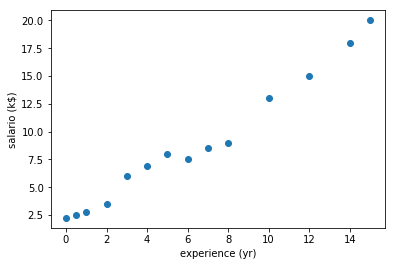

In [6]:
plt.scatter(data["experience"], data["salary"])
plt.xlabel("experience (yr)")
plt.ylabel("salario (k$)")
plt.show()

## Representación del Modelo

Dado el set de entrenamiento $(x^{(i)},\, y^{(i)})$ con $i = 1,\cdots,\,m$, el objetivo es encontrar mediante un algoritmo de aprendizaje una función $h_\theta : X \to Y$, de tal forma que $h_\theta(x)$ es un "buen" predictor del valor de $y$. El nombre de la función $h_\theta$ es llamada (función de) hipótesis. Esquemáticamente esto se puede representar como:

<img src="https://raw.githubusercontent.com/nicolasggiraldo/Curso_ML/master/Linear_Regression/img/ML_scheme.png" width=400px> (Créditos: Andrew Ng)

Si $y$ es continuo se tiene un problema de regresión, si $y$ es discreto es un problema de clasificación.

## Regresión Lineal

Para la regresión lineal la función de hipótesis se define como:

$$
h_\theta(x) = \theta_0 + \theta_1\, x
$$

donde $\theta_0$ y $\theta_1$ son los parámetros del modelo. 

Más adelante veremos que esta idea es fácilmente extensible a casos multidimensionales y a casos no lineales como expresiones cuadráticas o cúbicas.

## ¿Cómo elegir $\theta_0$ y $\theta_1$?

In [0]:
# Definiendo la funcion de hipotesis
def h(x, theta0, theta1):
  return theta0 + theta1 * x

In [8]:
def func0(theta0, theta1):
  plt.scatter(data["experience"], data["salary"])
  plt.plot(data["experience"], h(data["experience"], theta0, theta1), "C1")
  plt.vlines(x = data["experience"], 
             ymin = h(data["experience"], theta0, theta1), 
             ymax=data["salary"], color='C2')
  plt.xlabel("experience (yr)")
  plt.ylabel("salario (k$)")
  plt.show()
  

interact0 = interactive(func0, 
                        theta0 = (-4, 4, 0.1), 
                        theta1 = (-4, 4, 0.1))
display(interact0)

interactive(children=(FloatSlider(value=0.0, description='theta0', max=4.0, min=-4.0), FloatSlider(value=0.0, …

## Función de Costo

Basados en la intución mostrada en el gráfico anterior, se definirá la función de costo 

$$
J(\theta) = \frac{1}{2m}\sum_{i=1}^m \left(h_\theta(x^{(i)}) - y^{(i)}\right)^2,
$$

con $h_\theta(x^{(i)}) = \theta_0 + \theta_1\, x^{(i)}$, noten que dentro de la sumatoria se toma el cuadrado de la substracción esto en términos prácticos se hace para que siempre sea un número _positivo_. El objetivo es encontrar los valores de  $\theta_0$ y $\theta_1$ que minimicen la función de costo, esto es conocido normalmente como __"entrenar el modelo"__ y es un problema de optimización.

## Optimización

Al ser este un problema numérico relativamente sencillo, es posible usar funciones de optimización de scipy sin mayores inconvenientes

In [0]:
# Primero construyamos la matriz de Numpy correspondiente 
# para luego obtener X e y

data_np = data.values
X = data_np[:, 0]
y = data_np[:, 1]

In [10]:
# Definicion de la funcion de costo
def costFunction(X, y, theta):
  h_theta = h(X, theta[0], theta[1])
  m = len(y)
  return np.sum((h_theta - y)**2) * (0.5/m)

print("{:.2f}".format(costFunction(X, y, [0, 0])))

53.79


In [11]:
min_val = minimize(lambda theta : costFunction(X = X, y = y, theta = theta), [0,0])
theta_sol = min_val.x
print("theta0 = {:.2f}, theta1 = {:.2f}".format(theta_sol[0], theta_sol[1]))
print("Valor final Funcion de costo = {:.2f}".format(costFunction(X, y, theta_sol)))

theta0 = 1.66, theta1 = 1.14
Valor final Funcion de costo = 0.34


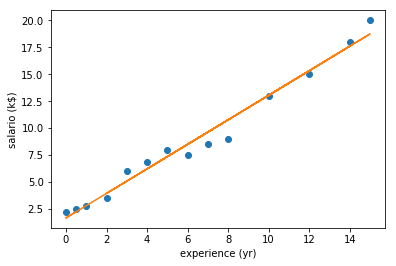

In [12]:
plt.scatter(X, y)
plt.plot(X, h(X, theta_sol[0], theta_sol[1]), "C1")
plt.xlabel("experience (yr)")
plt.ylabel("salario (k$)")
plt.show()

Sin embargo para problemas más complicados, el método de optimización estándar es el gradiente descendente el cual es óptimo para este tipo de problemas

## Derivadas, gradientes y tasas de cambio

Las derivadas indican la dirección de mayor cambio de una función dada. Por lo que si se deseara encontrar la dirección hacia la cual una función decrece es cuestión de ir en la dirección indicada por el negativo de la pendiente en ese punto.

Ejemplo en 1-D

In [13]:
def my_func(x):
  return x*x

def derivative(x, f, epsilon = 0.001):
  return (f(x + epsilon) - f(x - epsilon)) / (2 * epsilon)
  

x_range = np.linspace(-5, 5, num = 100)
x_deriv = np.array([-1, 0, 1])

def func1(x):
  plt.plot(x_range, my_func(x_range), color = "C0")
  plt.plot(x_deriv + x, x_deriv * derivative(x, my_func) + my_func(x), "C1")
  plt.scatter(x, my_func(x), color = "C2")
  plt.arrow(x, my_func(x), dx = -derivative(x, my_func)*0.5, dy = 0, head_width=0.4, head_length=0.2, fc='k', ec='k')
  plt.xlabel("$x$")
  plt.ylabel("$f(x)$")
  plt.title("$m$ = {:g}".format(derivative(x, my_func)))
  plt.show()
  
interact1 = interactive(func1, x = (-4, 4, 0.1))
display(interact1)

interactive(children=(FloatSlider(value=0.0, description='x', max=4.0, min=-4.0), Output()), _dom_classes=('wi…

Las derivades en múltiples dimensiones de una función $f$ se pueden extender mediante el gradiente $\nabla f$ que para un punto $x$ indica la dirección más rápida de cambio.

<img src="https://raw.githubusercontent.com/nicolasggiraldo/Curso_ML/master/Linear_Regression/img/grad_surf.gif" width=400px>(http://citadel.sjfc.edu/faculty/kgreen/vector/block2/pder/node8.html)

Para el caso de la función de costo $J$ los gradientes respecto a los parámetros  $\theta_0$ y $\theta_1$ son:

$$
\begin{align}
\frac{\partial J}{\partial \theta_0} &= \frac{1}{m}\sum_{i=1}^m \left(h_\theta(x^{(i)}) - y^{(i)}\right) \\
\frac{\partial J}{\partial \theta_1} &= \frac{1}{m}\sum_{i=1}^m \left(h_\theta(x^{(i)}) - y^{(i)}\right) x^{(i)}
\end{align}
$$

## Gradiente descendente


Al algoritmo del gradiente desendente está dado por:

>__Repetir hasta que converja : {__
$$
\begin{align}
\theta_0 & := \theta_0 - \alpha \frac{\partial J}{\partial \theta_0} = \theta_0 - \alpha \frac{1}{m}\sum_{i=1}^m \left(h_\theta(x^{(i)}) - y^{(i)}\right) \\
\theta_1 & := \theta_1 - \alpha \frac{\partial J}{\partial \theta_0} = \theta_1 - \alpha \frac{1}{m}\sum_{i=1}^m \left(h_\theta(x^{(i)}) - y^{(i)}\right) x^{(i)}
\end{align}
$$
__}__

Donde $\alpha$ se conoce como el _Learning Rate_. Es importante aclarar que la actualización de los parámetros debe ser simultanea, es decir no recalcular la función de costo hasta que todos los parámetros se hayan modificado.

### Nota: equilibrio estable / inestable y funciones convexas

><img src="https://whereisbuddha.files.wordpress.com/2013/08/descarga.jpeg" width=400px>

<img src="https://qph.fs.quoracdn.net/main-qimg-2f62803cd5ba745b6ae51aae6e6c165e.webp" width=400px>
<img src="https://qph.fs.quoracdn.net/main-qimg-38a9fcaf1d858194c0e3e623c05e9b87.webp" width=400px> (Créditos: Andrew Ng)

Procedamos a implementar el gradiente descendente:

In [0]:
def gradCost(X, y, theta):
  h_theta = h(X, theta[0], theta[1])
  
  m = len(X)
  
  # Calculando derivadas con respecto a los parámetros
  dtheta0 = np.sum(h_theta - y) / m
  dtheta1 = np.sum((h_theta - y) * X) / m
  
  return [dtheta0, dtheta1]

In [0]:
def gradientDescent(X, y, theta, alpha, iterations):
  theta_0 = theta
  for i in range(iterations):
    grad = gradCost(X, y, theta_0)
    for j in range(len(theta)):
      theta_0[j] -= alpha * grad[j]
  return theta_0

In [0]:
# Implementacion con Gradiente Descendente
theta_grad = gradientDescent(X, y, theta = [0, 0], alpha = 0.01, iterations = 800)
print("Optimizacion con Gradiende Descendente:")
print("theta0 = {:.2f}, theta1 = {:.2f}".format(theta_grad[0], theta_grad[1]))
print("Valor final Funcion de costo = {:.2f}".format(costFunction(X, y, theta_grad)))
print()

# Implementacion con optimizador de Scipy
min_val = minimize(lambda theta : costFunction(X = X, y = y, theta = theta), [0,0])
theta_sol = min_val.x
print("Optimizacion con Optimizador de Scipy:")
print("theta0 = {:.2f}, theta1 = {:.2f}".format(theta_sol[0], theta_sol[1]))
print("Valor final Funcion de costo = {:.2f}".format(costFunction(X, y, theta_sol)))

Optimizacion con Gradiende Descendente:
theta0 = 1.58, theta1 = 1.15
Valor final Funcion de costo = 0.34

Optimizacion con Optimizador de Scipy:
theta0 = 1.66, theta1 = 1.14
Valor final Funcion de costo = 0.34


Una representación gráfica

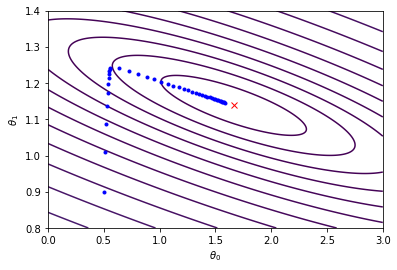

In [0]:
#(X, y, theta)

nx = ny = 500
u = np.linspace(0, 3, nx)
v = np.linspace(0.8, 1.4, ny)

ux, uy = np.meshgrid(u, v)
uz = np.zeros((nx, ny))
for i in range(nx):
    for j in range(ny):
        uz[i, j] = costFunction(X, y, [ux[i, j], uy[i, j]])
plt.contour(ux,uy,uz,np.logspace(-1, 2, 25))
plt.plot(theta_sol[0], theta_sol[1], "rx")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")

theta_grad = [0.5, 0.9]
plt.plot(theta_grad[0], theta_grad[1], "b.")
for i in range(1500):
  theta_grad = gradientDescent(X, y, theta = theta_grad, alpha = 0.005, iterations = 1)
  if i%50 == 0 or i < 10:
    plt.plot(theta_grad[0], theta_grad[1], "b.")

plt.show()

## Vectorización y extensión a más dimensiones

Para la vectorización definamos una observación $x^{(i)}$ con $n$ columnas de la siguiente forma:

$$
\begin{align}
x^{(i)} &= (x^{(i)}_0,\,x^{(i)}_1,\,\cdots,x^{(i)}_n) \\
&= (1,\,x^{(i)}_1,\,\cdots,x^{(i)}_n),
\end{align}
$$
es decir, $x^{(i)}_0 = 1$. Adicional, si definimos el vector de parámetros $\theta$ como:
$$
\theta = (\theta_0,\,\theta_1,\,\cdots,\theta_n),
$$
entonces podemos definir la hpótesis como:
$$
\begin{align}
h_\theta(x^{(i)}) &= \theta\, (x^{(i)})^T \\
&= \theta_0\,x^{(i)}_0 + \theta_1\, x^{(i)}_0 + \cdots + \theta_n\,x^{(i)}_n
\end{align},
$$
noten que si hacemos $n=1$ llegamos a la regresión lineal con una variable que hemos estado estudiando arriba. 

Con base en lo anterior y definiendo la matriz de entrenamiento $X$,
$$
X = 
\begin{bmatrix} 
x^{(1)} \\
x^{(2)} \\
\vdots \\
x^{(m)}
\end{bmatrix},
$$
es posible definir la vectorización como
$$
h_\theta(X) = \theta\,X^T.
$$

Es decir, una solución para vectorizar es agregar una columna 1's al comienzo de la matriz que será multiplicada con el parámetro $\theta_0$, esta formulación nos será también de utilidad para incluir dimensiones adicionales o definir polinomios de grado superior como se mostrará más adelante.

Para hacer la vectorización se usará la función np.c_:

In [0]:
# Agregando columna de bias
X = np.c_[np.ones(data.shape[0]), data["experience"].values]
y = data["salary"].values

print("X shape : {}".format(X.shape))
print(X)
print()
print("y shape : {}".format(y.shape))
print(y)

X shape : (14, 2)
[[ 1.   0.5]
 [ 1.   0. ]
 [ 1.   1. ]
 [ 1.   5. ]
 [ 1.   8. ]
 [ 1.   4. ]
 [ 1.  15. ]
 [ 1.   7. ]
 [ 1.   3. ]
 [ 1.   2. ]
 [ 1.  12. ]
 [ 1.  10. ]
 [ 1.  14. ]
 [ 1.   6. ]]

y shape : (14,)
[ 2.5   2.25  2.75  8.    9.    6.9  20.    8.5   6.    3.5  15.   13.
 18.    7.5 ]


Con esto la vectorización estará dada por:

In [0]:
def h_v(X, theta):
  return np.matmul(theta, X.transpose())

def costFunction_v(X, y, theta):
  h_theta = h_v(X, theta)
  return 0.5 * np.mean((h_theta - y)**2)

def gradCost_v(X, y, theta):
  h_theta = h_v(X, theta)
  return np.matmul((h_theta - y), X) / X.shape[0]

In [0]:
def gradientDescent_v(X, y, theta, alpha, iterations):
  theta_0 = np.array(theta, dtype = "float")
  for i in range(iterations):
    grad = gradCost_v(X, y, theta_0)
    theta_0 -= alpha * grad
  return theta_0

In [0]:
theta = gradientDescent_v(X, y, [0, 0], 0.01, 800)
print(theta)

[1.58305061 1.14653454]


# Regresión polinomica

La implementación de polinomios de grado superior corresponde a integrar columnas adicionales (a parte de la columna de 1's al comienzo) a la matriz de numpy con las potencias deseadas, a continuación mostramos un ejemplo con un polinomio de grado 2.

Generemos unos datos sintéticos:

In [0]:
# parametros
param = [10, 2, 2]
n_sample = 50
np.random.seed(0)
x = np.linspace(0, 5, num = n_sample)
y = param[0] + (param[1] * x) + (param[2] * x**2) + np.random.normal(-1, 1, n_sample)

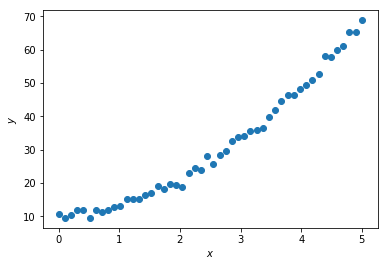

In [0]:
plt.scatter(x,y)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

In [0]:
# Agregando columna de uno correspondiente al bias
X_pol = np.c_[np.ones(len(x)), x, x**2]
X_pol[:10]

array([[1.        , 0.        , 0.        ],
       [1.        , 0.10204082, 0.01041233],
       [1.        , 0.20408163, 0.04164931],
       [1.        , 0.30612245, 0.09371095],
       [1.        , 0.40816327, 0.16659725],
       [1.        , 0.51020408, 0.2603082 ],
       [1.        , 0.6122449 , 0.37484382],
       [1.        , 0.71428571, 0.51020408],
       [1.        , 0.81632653, 0.666389  ],
       [1.        , 0.91836735, 0.84339858]])

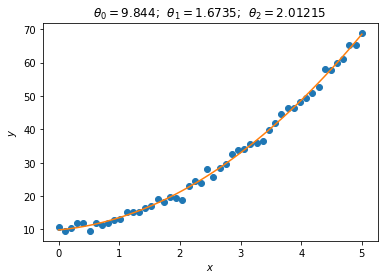

In [0]:
theta = gradientDescent_v(X_pol, y, [0, 0, 0], 0.01, 5000)

plt.scatter(x, y)
plt.plot(x, h_v(X_pol, theta), "C1")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title(r"$\theta_0 = {:g}$;  $\theta_1 = {:g}$;  $\theta_2 = {:g}$".format(theta[0], theta[1], theta[2]))
plt.show()

In [0]:
min_val = minimize(lambda theta : costFunction_v(X = X_pol, y = y, theta = theta), [0,0,0])
theta_sol = min_val.x
print("Optimizacion con Optimizador de Scipy:")
print("theta0 = {:.2f}, theta1 = {:.2f}, theta1 = {:.2f}".format(theta_sol[0], theta_sol[1], theta_sol[2]))
print("Valor final Funcion de costo = {:.2f}".format(costFunction_v(X_pol, y, theta_sol)))

Optimizacion con Optimizador de Scipy:
theta0 = 10.00, theta1 = 1.53, theta1 = 2.04
Valor final Funcion de costo = 0.54


## Regresión en 2D

In [0]:
!wget https://raw.githubusercontent.com/nicolasggiraldo/Curso_ML/master/Linear_Regression/data/housing.txt

--2019-07-04 21:38:15--  https://raw.githubusercontent.com/nicolasggiraldo/Curso_ML/master/Linear_Regression/data/housing.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 657 [text/plain]
Saving to: ‘housing.txt.1’

housing.txt.1       100%[===================>]     657  --.-KB/s    in 0s      

2019-07-04 21:38:15 (141 MB/s) - ‘housing.txt.1’ saved [657/657]



In [0]:
data = pd.read_csv("/content/housing.txt", names= ["size", "N_bedrooms", "price"])
data.head()

,size,N_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


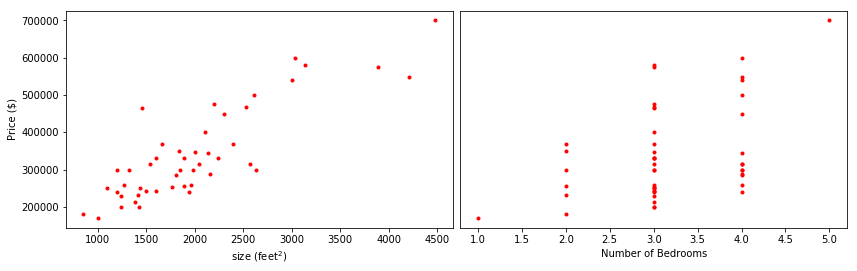

In [0]:
plt.figure(figsize=(14,4))

ax1 = plt.subplot(121)
plt.plot(data["size"], data["price"], "r.")
plt.xlabel("size (feet$^2$)")
plt.ylabel("Price ($)")

ax2 = plt.subplot(122)
plt.subplots_adjust(wspace = 0.02)
plt.plot(data["N_bedrooms"], data["price"], "r.")
plt.xlabel("Number of Bedrooms")
ax2.set_yticks([])

plt.show()

Una buena práctica es normalizar los $x^{(i)}$, esto es útil para acelerar el proceso de convergencia del algoritmo de gradiente descendente, noten que la variable respuesta $y$ __no__ se normaliza

In [0]:
def featureNormalize(X):
  X_norm = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0)
  return X_norm

In [0]:
X = data[["size",	"N_bedrooms"]].values
y = data["price"].values
X_norm = featureNormalize(X)

#print(np.mean(X, axis = 0))
#print(np.mean(X_norm, axis = 0))

X_norm = np.c_[np.ones(X_norm.shape[0]), X_norm]
X_norm[:5]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

In [0]:
def gradientDescent_with_cost_hist(X, y, theta, alpha, iterations):
  theta_0 = np.array(theta, dtype = "float")
  J_hist = [costFunction_v(X, y, theta)]
  for i in range(iterations):
    grad = gradCost_v(X, y, theta_0)
    theta_0 -= alpha * grad
    J_hist.append(costFunction_v(X, y, theta_0))
  return theta_0, J_hist

Comparemos con la solución analítica:

In [0]:
def normalEqn(X, y):
  XTX_inv = np.linalg.pinv(np.matmul(X.transpose(), X))
  return np.matmul(np.matmul(XTX_inv, X.transpose()), y)

In [0]:
theta, J_hist = gradientDescent_with_cost_hist(X_norm, y, [0, 0, 0], 0.01, 2000)
theta_analytic = normalEqn(X_norm, y)
print("theta =", theta)
print("Analytical solution =", theta_analytic)
diff = np.abs((np.array(theta) - np.array(theta_analytic)) / np.array(theta_analytic)) * 100
print("%diff =", diff)

theta = [340412.65894002 109439.22578243  -6569.78416695]
Analytical solution = [340412.65957447 109447.79646964  -6578.35485416]
%diff = [1.86375726e-07 7.83084492e-03 1.30286179e-01]


Noten como decrece la función de costo hasta converger a un valor dado, ahí diríamos que el modelo "terminó de entrenar":

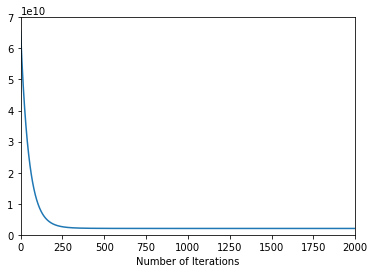

In [0]:
plt.plot(J_hist)
plt.xlim(left = 0, right = len(J_hist))
plt.ylim(top = 7e10, bottom = 0)
plt.xlabel("Number of Iterations")
plt
plt.show()